In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#Olx Car Price Prediction

In [ ]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Data Science/Machine Learning /CSV files/OLX_cars_dataset00.csv')

In [ ]:
df.head() # First few rows

,Ad ID,Car Name,Make,Model,Year,KM's driven,Price,Fuel,Registration city,Car documents,Assembly,Transmission,Condition,Seller Location,Description,Car Features,Images URL's,Car Profile
0,1079071571,fresh import Passo 2021model,Toyota,Passo,2021,54000,4190000,Petrol,Unregistered,Original,Imported,Automatic,Used,"Airline Avenue, Islamabad","it's 2021 model fresh import, perfect engine s...","ABS, Air Bags, AM/FM Radio, CD Player, Cassett...",['https://images.olx.com.pk/thumbnails/4039460...,https://www.olx.com.pk/item/fresh-import-passo...
1,1080125520,Suzuki ravi,Suzuki,Ravi,2018,95000,1300000,Petrol,Karachi,Original,Local,Manual,Used,"Kahuta, Rawalpindi",Suzuki ravi 2018 col,AM/FM Radio,['https://images.olx.com.pk/thumbnails/4102504...,https://www.olx.com.pk/item/suzuki-ravi-iid-10...
2,1080748789,Suzuki bolan 2015 contact 03112271054,Suzuki,Bolan,2015,50000,800000,Petrol,Karachi,Original,Local,Manual,Used,"Lyari Expressway, Karachi",Suzuki bolan model 2015 reg 2022 ghadi me koi ...,Rear speakers,['https://images.olx.com.pk/thumbnails/4139520...,https://www.olx.com.pk/item/suzuki-bolan-2015-...
3,1076081635,Diahatsu Move 2013,Daihatsu,Move,2013,94000,2155000,Petrol,Lahore,Original,Imported,Automatic,Used,"New Amir Town, Lahore",Move Push start \nHome Used car. \nModel 2013....,"ABS, Air Bags, Air Conditioning, Alloy Rims, A...",['https://images.olx.com.pk/thumbnails/3865337...,https://www.olx.com.pk/item/diahatsu-move-2013...
4,1080812928,Suzuki Swift DLX 2011 miner tuchap,Suzuki,Swift,2011,126544,1440000,Petrol,Karachi,Original,Local,Manual,Used,"Shadman 2, Karachi",Suzuki Swift DLX\nAbS Break 100%\nengine 100%\...,"ABS, Air Conditioning, Alloy Rims, AM/FM Radio...",['https://images.olx.com.pk/thumbnails/4143509...,https://www.olx.com.pk/item/suzuki-swift-dlx-2...


In [ ]:
df.tail() # Last few rows

,Ad ID,Car Name,Make,Model,Year,KM's driven,Price,Fuel,Registration city,Car documents,Assembly,Transmission,Condition,Seller Location,Description,Car Features,Images URL's,Car Profile
9174,1080606577,Suzuki Wagon R Japanese 660cc sale/exchange,Suzuki,Wagon R,2014,115000,2725000,Petrol,Islamabad,Original,Imported,Automatic,Used,"G-13, Islamabad",Japanese Wagon R 2014 Full automatic option Re...,"ABS, Air Bags, Air Conditioning, Alloy Rims, A...",['https://images.olx.com.pk/thumbnails/4131117...,https://www.olx.com.pk/item/suzuki-wagon-r-jap...
9175,1080268395,wegon R VXL 2017,Suzuki,Wagon R,2017,100000,1850000,Petrol,Lahore,Original,Local,Manual,Used,"New Satellite Town, Sargodha",wegon r vxl 2017 model 2 piece touch Ac on new...,"Air Conditioning, CD Player, Power Steering, P...",['https://images.olx.com.pk/thumbnails/4111048...,https://www.olx.com.pk/item/wegon-r-vxl-2017-i...
9176,1080570925,Good condition,KIA,Spectra,2001,123456,1100000,Petrol,Lahore,Original,Imported,Automatic,Used,"Wahdat Colony, Taxila",karobar may invest karna hay,"Air Conditioning, AM/FM Radio, DVD Player, Pow...",['https://images.olx.com.pk/thumbnails/4129002...,https://www.olx.com.pk/item/good-condition-iid...
9177,1075792717,Suzuki Alto vxr,Suzuki,Alto,2009,89000,970000,Petrol,Lahore,Original,Imported,Manual,Used,"Yar Hussain - Chota Lahor Rd, Swabi","Suzuki Alto Vxr \nAC, HEATER INSTALLED\nCNG, P...","Air Conditioning, AM/FM Radio, Front Speakers,...",['https://images.olx.com.pk/thumbnails/3848969...,https://www.olx.com.pk/item/suzuki-alto-vxr-ii...
9178,1080569552,Move Custom,Daihatsu,Move,2016,95000,2050000,Petrol,Gujranwala,Original,Imported,Automatic,Used,"Gujranwala Bypass, Gujranwala",sides shower \n23 average feul\nmy own registe...,"ABS, Air Bags, Air Conditioning, Alloy Rims, A...",['https://images.olx.com.pk/thumbnails/4128920...,https://www.olx.com.pk/item/move-custom-iid-10...


In [ ]:
# Information about columns and data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9179 entries, 0 to 9178
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Ad ID              9179 non-null   int64 
 1   Car Name           9179 non-null   object
 2   Make               9179 non-null   object
 3   Model              9179 non-null   object
 4   Year               9179 non-null   int64 
 5   KM's driven        9179 non-null   int64 
 6   Price              9179 non-null   int64 
 7   Fuel               9179 non-null   object
 8   Registration city  9179 non-null   object
 9   Car documents      9179 non-null   object
 10  Assembly           9179 non-null   object
 11  Transmission       9179 non-null   object
 12  Condition          9179 non-null   object
 13  Seller Location    9179 non-null   object
 14  Description        9179 non-null   object
 15  Car Features       9179 non-null   object
 16  Images URL's       9179 non-null   object


In [ ]:
df.shape # Dimensions of the dataset

(9179, 18)

In [ ]:
columns =df.columns # Get column names
print(columns)

Index(['Ad ID', 'Car Name', 'Make', 'Model', 'Year', 'KM's driven', 'Price',
       'Fuel', 'Registration city', 'Car documents', 'Assembly',
       'Transmission', 'Condition', 'Seller Location', 'Description',
       'Car Features', 'Images URL's', 'Car Profile'],
      dtype='object')


In [ ]:

#Drop irrelevant columns
df.drop(['Images URL\'s', 'Registration city', 'Car Profile', 'Description', 'Ad ID', 'Seller Location', 'Car Features'], axis=1, inplace=True)

In [ ]:
df.shape

(9179, 11)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9179 entries, 0 to 9178
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Car Name       9179 non-null   object
 1   Make           9179 non-null   object
 2   Model          9179 non-null   object
 3   Year           9179 non-null   int64 
 4   KM's driven    9179 non-null   int64 
 5   Price          9179 non-null   int64 
 6   Fuel           9179 non-null   object
 7   Car documents  9179 non-null   object
 8   Assembly       9179 non-null   object
 9   Transmission   9179 non-null   object
 10  Condition      9179 non-null   object
dtypes: int64(3), object(8)
memory usage: 788.9+ KB


In [ ]:

#LabelEncoder to convert text-based categories into numerical values.
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for column in df.select_dtypes(include=['object']).columns:
    label=le.fit(df[column])
    df[column] = label.fit_transform(df[column])

In [ ]:
#Calculating the correlation matrix and sorting correlations with 'Price'

correlation_matrix = df.corr()
print(correlation_matrix['Price'].sort_values(ascending=False))

Price            1.000000
Year             0.680901
Assembly         0.132720
Fuel             0.130603
Make             0.065637
Car documents    0.055482
Car Name        -0.023066
Model           -0.057632
KM's driven     -0.188484
Transmission    -0.461263
Condition             NaN
Name: Price, dtype: float64


In [ ]:
df.head()

,Car Name,Make,Model,Year,KM's driven,Price,Fuel,Car documents,Assembly,Transmission,Condition
0,6574,10,44,2021,54000,4190000,3,1,0,0,0
1,4830,9,47,2018,95000,1300000,3,1,1,1,0
2,4686,9,4,2015,50000,800000,3,1,1,1,0
3,1509,2,42,2013,94000,2155000,3,1,0,0,0
4,4482,9,52,2011,126544,1440000,3,1,1,1,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9179 entries, 0 to 9178
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Car Name       9179 non-null   int64
 1   Make           9179 non-null   int64
 2   Model          9179 non-null   int64
 3   Year           9179 non-null   int64
 4   KM's driven    9179 non-null   int64
 5   Price          9179 non-null   int64
 6   Fuel           9179 non-null   int64
 7   Car documents  9179 non-null   int64
 8   Assembly       9179 non-null   int64
 9   Transmission   9179 non-null   int64
 10  Condition      9179 non-null   int64
dtypes: int64(11)
memory usage: 788.9 KB


In [ ]:
df.isna().any() # Check for missing values

,0
Car Name,False
Make,False
Model,False
Year,False
KM's driven,False
Price,False
Fuel,False
Car documents,False
Assembly,False
Transmission,False


In [ ]:
df.isna().sum() # Count missing values

,0
Car Name,0
Make,0
Model,0
Year,0
KM's driven,0
Price,0
Fuel,0
Car documents,0
Assembly,0
Transmission,0


In [ ]:
df.shape

(9179, 11)

In [ ]:
df.duplicated().sum() # Check for duplicate rows

229

In [ ]:
df = df.drop_duplicates() # Remove duplicate rows

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.shape

(8950, 11)

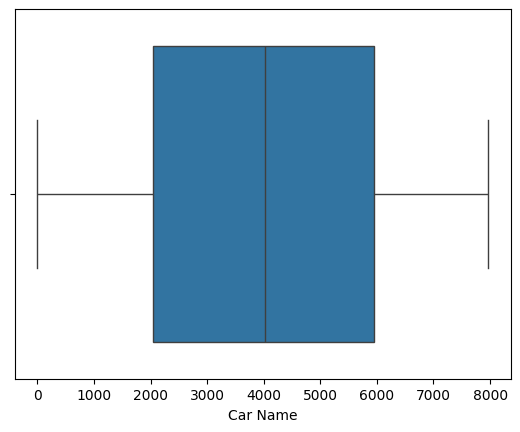

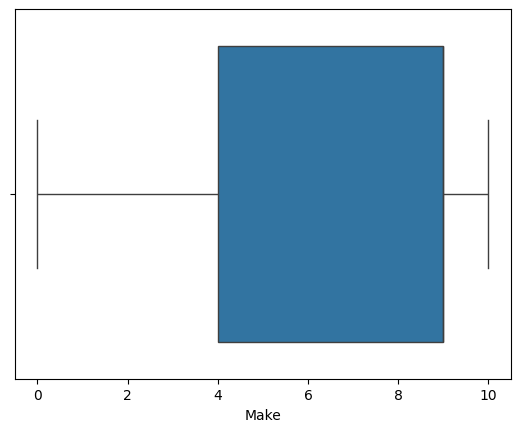

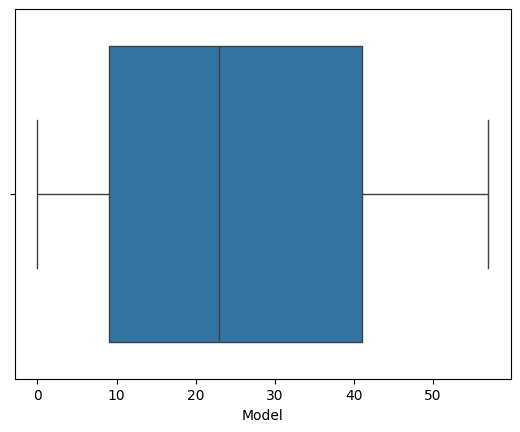

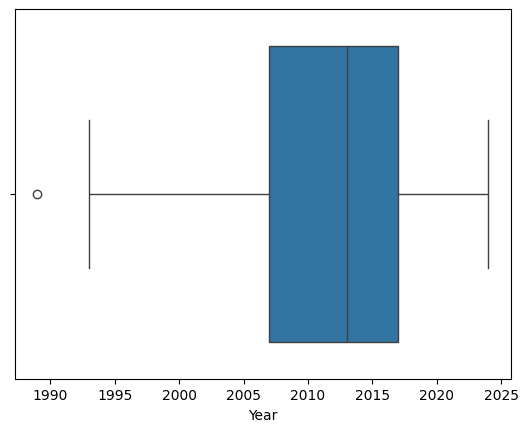

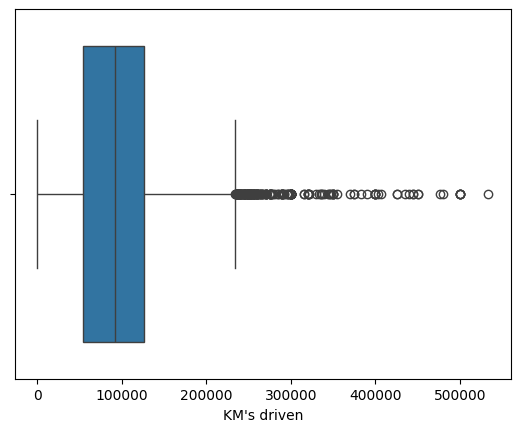

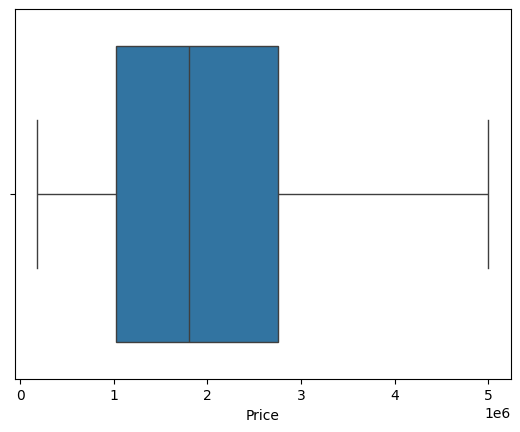

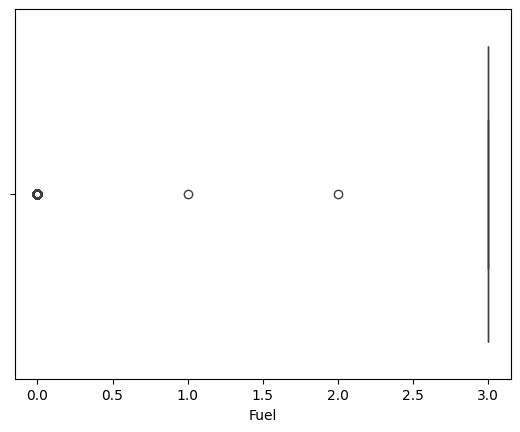

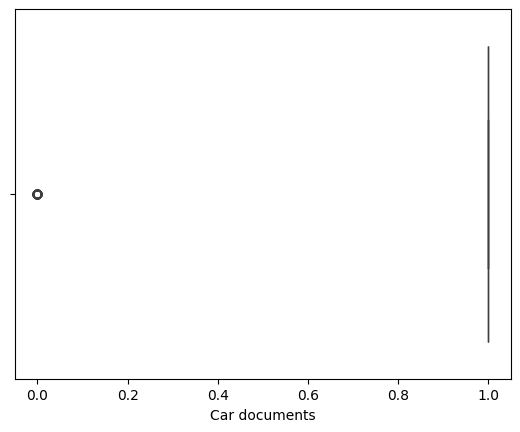

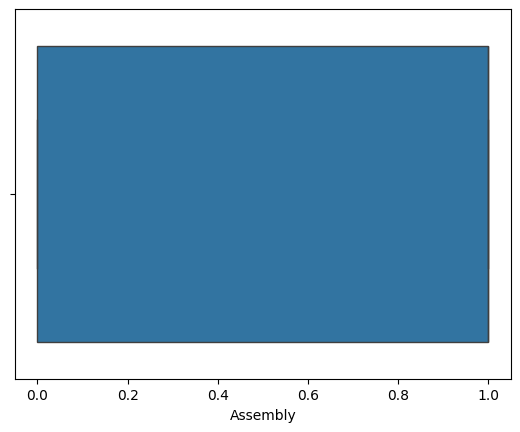

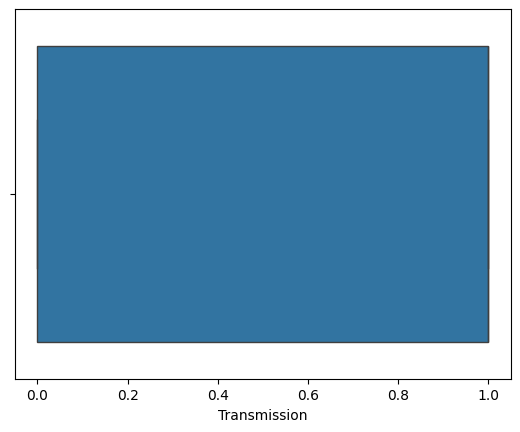

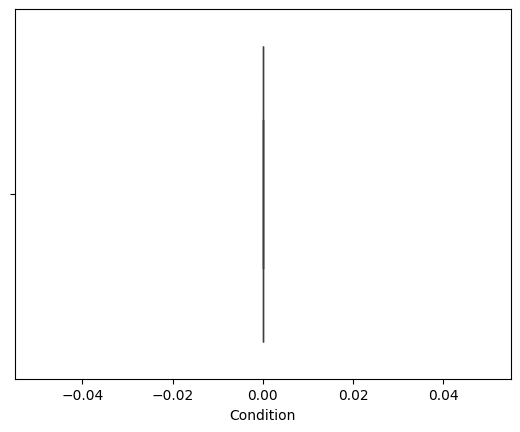

In [ ]:
#Visualizing outliers using box plots

for column in df.columns:
    sns.boxplot(x=df[column])
    plt.show()

In [ ]:
#Removing outliers for each numeric feature based on the interquartile range (IQR)

def remove_outliers(df, column, multiplier=1.5):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Before removal
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    sns.boxplot(df[column])
    plt.title(f'{column} Before Outlier Removal')

    # Filter out the outliers
    df_cleaned = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

    # After removal
    plt.subplot(1, 2, 2)
    sns.boxplot(df_cleaned[column])
    plt.title(f'{column} After Outlier Removal')

    plt.show()

    return df_cleaned

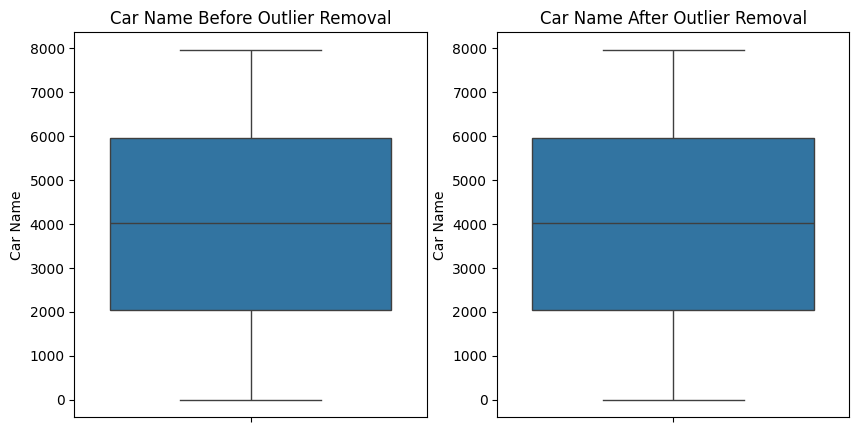

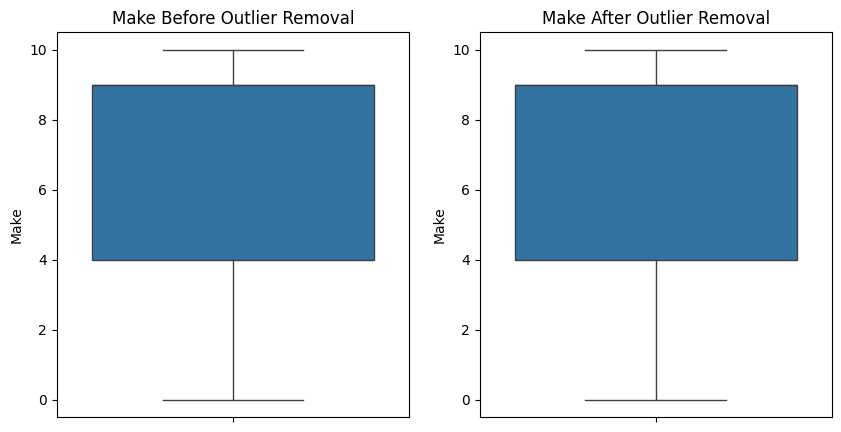

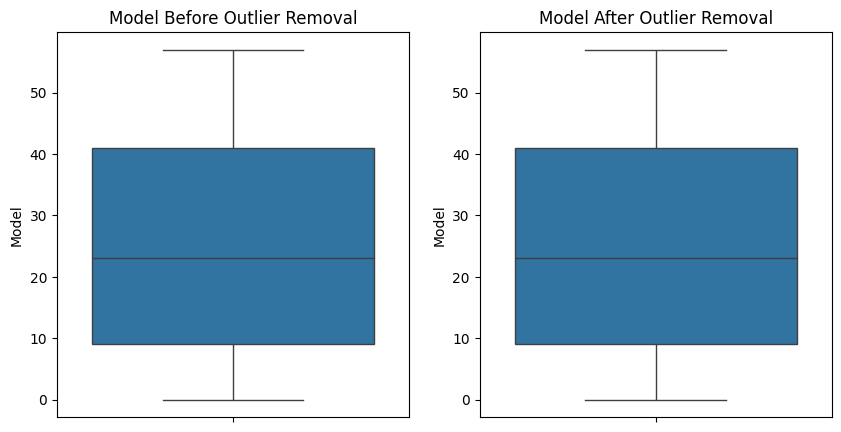

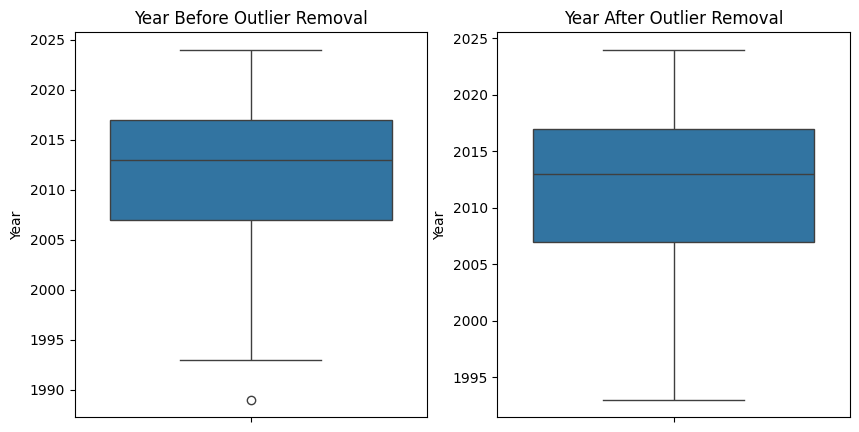

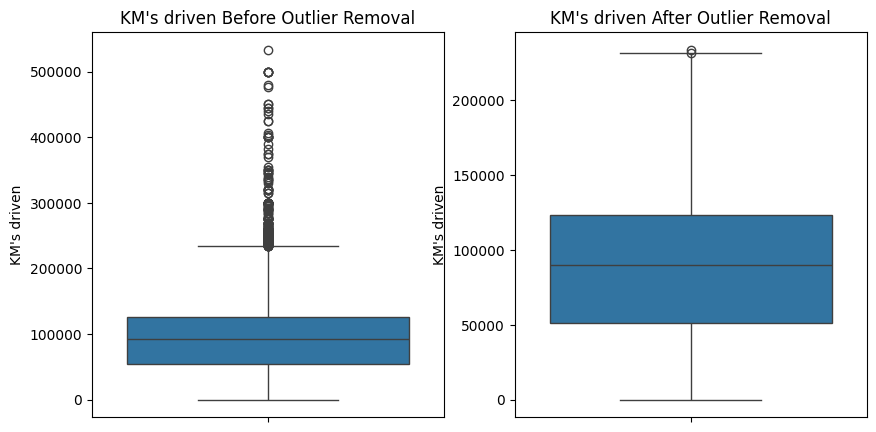

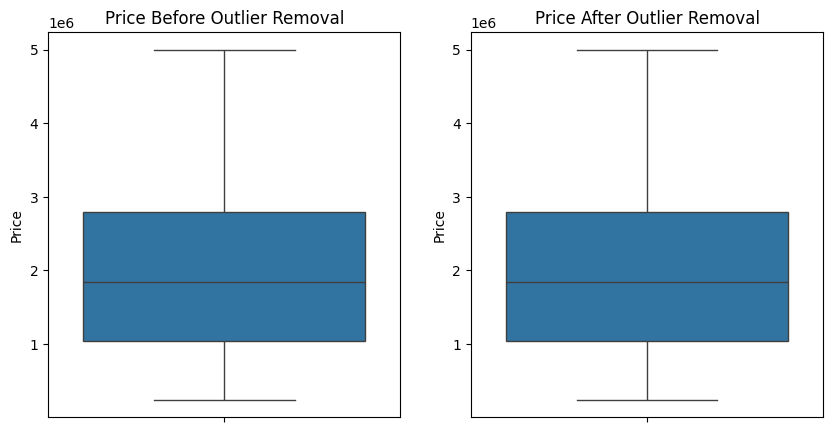

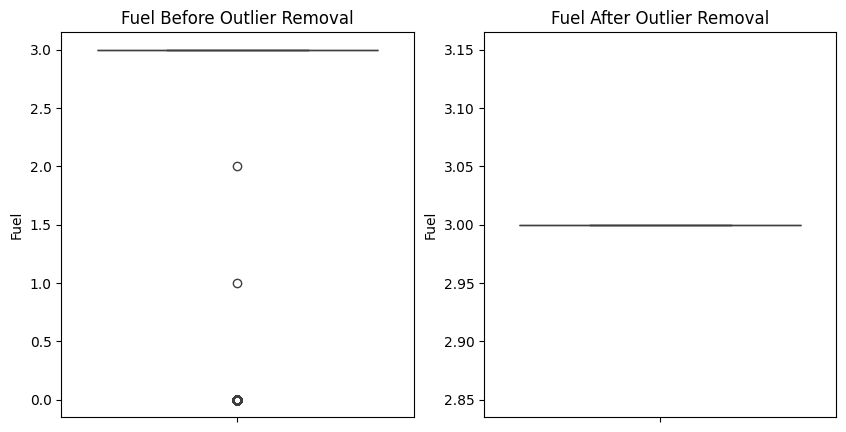

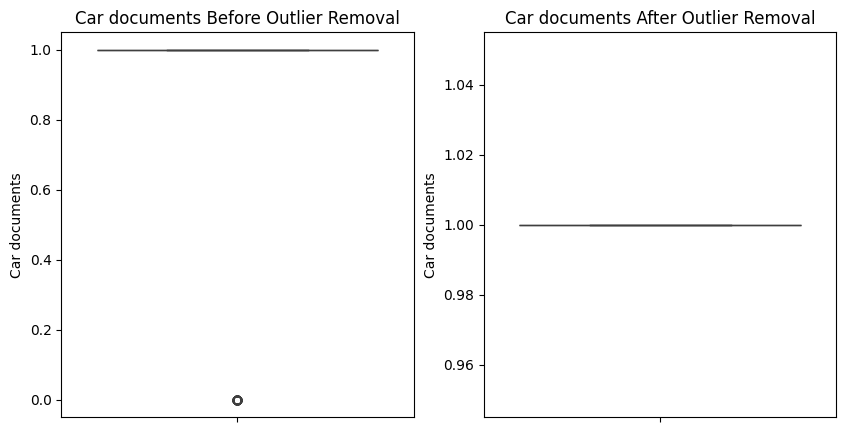

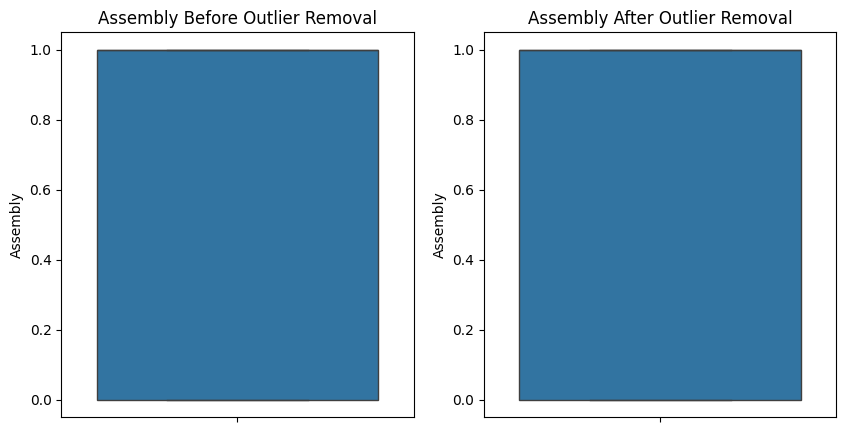

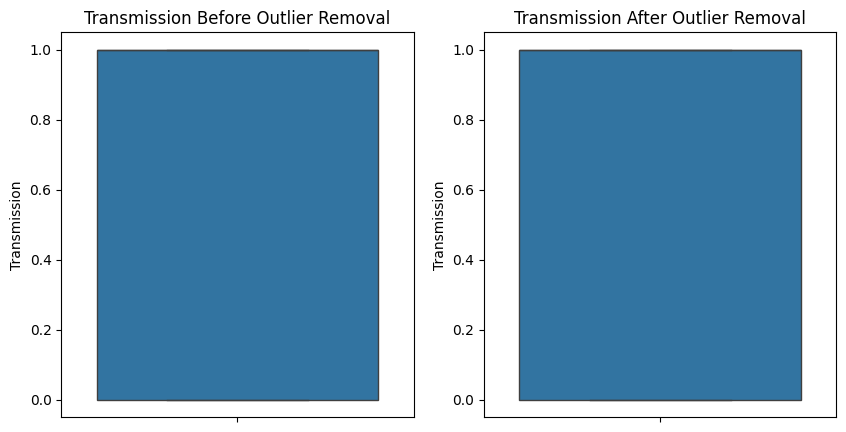

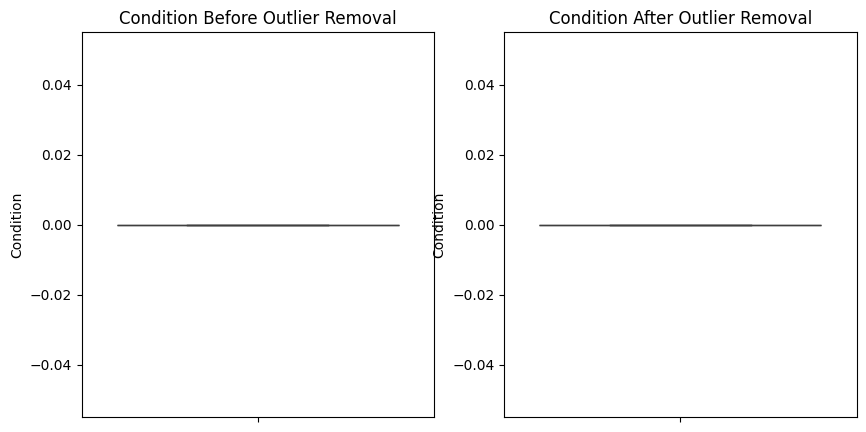

In [ ]:
#Selecting numerical columns

num_cols = df.select_dtypes(include=['number']).columns


#Removing outliers from each numeric column

for col in num_cols:
    df = remove_outliers(df, col)

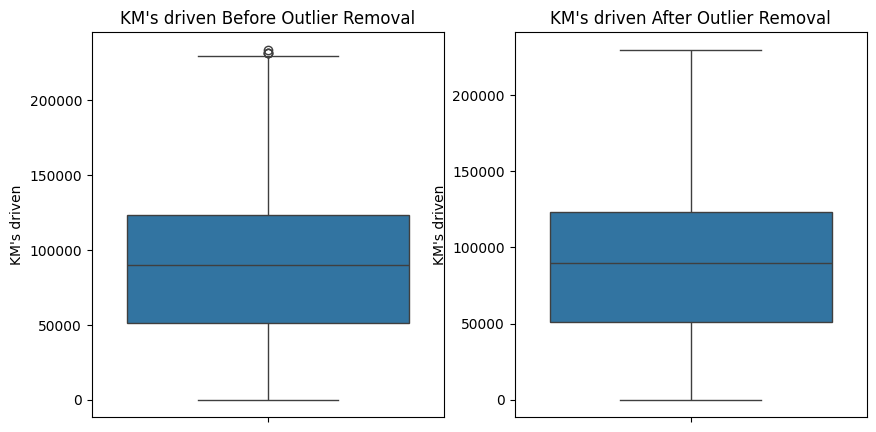

In [ ]:
#Removing outliers from "KM's driven" again with increasing the multiplier

df = remove_outliers(df, "KM's driven", multiplier=2.0)

In [ ]:
df.shape

(8441, 11)

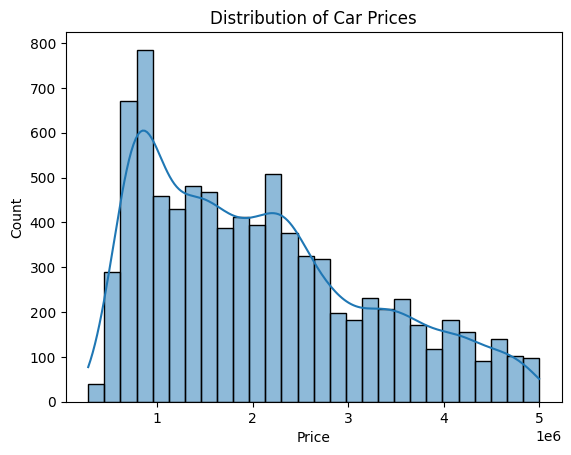

Empty DataFrame
Columns: [Car Name, Make, Model, Year, KM's driven, Price, Fuel, Car documents, Assembly, Transmission, Condition]
Index: []


In [ ]:
#Plotting car price distribution

# Plot the distribution of the target variable 'Price'
sns.histplot(df['Price'], kde=True)
plt.title('Distribution of Car Prices')
plt.show()

# Check for negative or zero values in the target variable
print(df[df['Price'] <= 0])

#Training and Testing

In [ ]:
#Splitting the data into features (X) and target (Y)

x = df.drop(['Price'], axis=1)
y = df['Price']

In [ ]:
#Splitting the data into training and testing sets

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
#Printing dataset shapes after the split

print('original dataset=',x.shape, y.shape)
print('training dataset=',x_train.shape, y_train.shape)
print('testing dataset=',x_test.shape, y_test.shape)

original dataset= (8441, 10) (8441,)
training dataset= (6752, 10) (6752,)
testing dataset= (1689, 10) (1689,)


In [ ]:
#Scaling the features using StandardScaler

from sklearn.preprocessing import StandardScaler
std = StandardScaler()
x_test2 = std.fit_transform(x_test)
x_train2 = std.fit_transform(x_train)

In [ ]:
print('standard_training dataset=',x_train2.shape, y_train.shape)
print('standard_testing dataset=',x_test2.shape, y_test.shape)

standard_training dataset= (6752, 10) (6752,)
standard_testing dataset= (1689, 10) (1689,)


#Decision tree

In [ ]:
#Checking Price distribution

df['Price'].value_counts()

,count
Price,
850000,111
2250000,95
750000,93
650000,93
2300000,91
...,...
4199000,1
4035000,1
2765000,1


In [ ]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
#Training the Decision Tree Regressor

dt = DecisionTreeRegressor(max_depth=6)
dt.fit(x_train, y_train)

DecisionTreeRegressor(max_depth=6)

In [ ]:
dt_pred_train = dt.predict(x_train)
dt_pred_test = dt.predict(x_test)

dt_pred_test # This line shows predicted values

array([3603225.80645161, 4310948.97959184,  758338.70967742, ...,
       4310948.97959184, 2236232.38815789, 1448541.87192118])

In [ ]:
# Check distribution of prices in training data
y_train.value_counts()

,count
Price,
850000,93
2300000,81
2250000,78
650000,76
1350000,75
...,...
1455000,1
1510000,1
2840000,1


In [ ]:
# Check distribution of prices in testing data

y_test.value_counts()

,count
Price,
1550000,21
2100000,19
750000,19
950000,18
850000,18
...,...
1930000,1
1285000,1
1510000,1


In [ ]:
training_score=dt.score(x_train,y_train)
training_score

0.8950494331705329

In [ ]:
testing_score=dt.score(x_test,y_test)
testing_score

0.8814033758584392

In [ ]:
#Calculating the R² score of training and testing data

print(f"Training R² Score: {r2_score(y_train, dt_pred_train)}")
print(f"Testing R² Score: {r2_score(y_test, dt_pred_test)}")

Training R² Score: 0.8950494331705329
Testing R² Score: 0.8814033758584392


In [ ]:
#Calculating the Mean Squared Error (MSE) and Mean Absolute Error (MAE)

print("Decision Tree MSE:", mean_squared_error(y_test,dt_pred_test))
print("Decision Tree MAE:", mean_absolute_error(y_test,dt_pred_test))

Decision Tree MSE: 160982519665.2274
Decision Tree MAE: 283571.61899013


#KNN

In [ ]:
#Checking the dataset size

df.size

92851

In [ ]:
df.shape

(8441, 11)

In [ ]:
#Scaling the features using MinMaxScaler

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_train1 = scaler.fit_transform(x_train)
x_test1 = scaler.transform(x_test)

In [ ]:
#Printing the shape of the scaled datasets

print('MinMax_training dataset=',x_train1.shape, y_train.shape)
print('MinMax_testing dataset=',x_test1.shape, y_test.shape)

MinMax_training dataset= (6752, 10) (6752,)
MinMax_testing dataset= (1689, 10) (1689,)


In [ ]:
from sklearn.neighbors import KNeighborsRegressor

In [ ]:
#Training the KNN Regressor

knn = KNeighborsRegressor()
knn.fit(x_train1, y_train)

KNeighborsRegressor()

In [ ]:
knn_pred_train = knn.predict(x_train1)
knn_pred_test = knn.predict(x_test1)

In [ ]:
knn_pred_test # This line shows predicted values

array([4506000., 4225000.,  768000., ..., 4155000., 2323000., 1695000.])

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [ ]:
training_score=knn.score(x_train1,y_train)
training_score

0.9325484849413075

In [ ]:
testing_score=knn.score(x_test1,y_test)
testing_score

0.8887894508636813

In [ ]:
#Calculating the R² score of training and testing data

print(f"Training R² Score: {r2_score(y_train, knn_pred_train)}")
print(f"Testing R² Score: {r2_score(y_test, knn_pred_test)}")

Training R² Score: 0.9325484849413075
Testing R² Score: 0.8887894508636813


In [ ]:
#Calculating the Mean Squared Error (MSE) and Mean Absolute Error (MAE)

print("KNN MSE:", mean_squared_error(y_test,knn_pred_test))
print("KNN MAE:", mean_absolute_error(y_test,knn_pred_test))

KNN MSE: 150956694955.7401
KNN MAE: 258881.17300177622


#Random Forest

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8441 entries, 0 to 9178
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Car Name       8441 non-null   int64
 1   Make           8441 non-null   int64
 2   Model          8441 non-null   int64
 3   Year           8441 non-null   int64
 4   KM's driven    8441 non-null   int64
 5   Price          8441 non-null   int64
 6   Fuel           8441 non-null   int64
 7   Car documents  8441 non-null   int64
 8   Assembly       8441 non-null   int64
 9   Transmission   8441 non-null   int64
 10  Condition      8441 non-null   int64
dtypes: int64(11)
memory usage: 791.3 KB


In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
from scipy.stats import randint as sp_randint
from sklearn.ensemble import RandomForestRegressor

In [ ]:

##Training the RandomForest Regressor

rf=RandomForestRegressor(max_depth=5,random_state=42)

In [ ]:
rf.fit(x_train,y_train)

RandomForestRegressor(max_depth=5, random_state=42)

In [ ]:
rf_pred_train=rf.predict(x_train)
rf_pred_test=rf.predict(x_test)

In [ ]:
rf_pred_test #This line shows predicted values

array([3022585.41838672, 4156503.28450434, 1018158.64748392, ...,
       4152049.29549359, 2424353.00163358, 1160349.8780845 ])

In [ ]:
training_score = rf.score(x_train,y_train)
training_score

0.8717655717835555

In [ ]:
testing_score = rf.score(x_test,y_test)
testing_score

0.8575819563164895

In [ ]:
#Calculating the R² score of training and testing data

print(f"Training R² Score: {r2_score(y_train, rf_pred_train)}")
print(f"Testing R² Score: {r2_score(y_test, rf_pred_test)}")

Training R² Score: 0.8717655717835555
Testing R² Score: 0.8575819563164895


In [ ]:
#Calculating the Mean Squared Error (MSE) and Mean Absolute Error (MAE)

print("Random Forest MSE:", mean_squared_error(y_test, rf_pred_test))
print("Random Forest MAE:", mean_absolute_error(y_test, rf_pred_test))

Random Forest MSE: 193317606499.47128
Random Forest MAE: 325833.5123860744


# Sample prediction

In [ ]:
df.head()

,Car Name,Make,Model,Year,KM's driven,Price,Fuel,Car documents,Assembly,Transmission,Condition
0,6574,10,44,2021,54000,4190000,3,1,0,0,0
1,4830,9,47,2018,95000,1300000,3,1,1,1,0
2,4686,9,4,2015,50000,800000,3,1,1,1,0
3,1509,2,42,2013,94000,2155000,3,1,0,0,0
4,4482,9,52,2011,126544,1440000,3,1,1,1,0


In [ ]:
# Sample data for prediction (using numeric encoded values)

sample_data = {
    'Car Name': 1509,  # Example numeric value for 'Car Name'
    'Make': 2,        # Example numeric value for 'Make'
    'Model': 42,       # Example numeric value for 'Model'
    'Year': 2013,     # Example numeric value for 'Year'
    "KM's driven": 94000,  # Example numeric value for "KM's driven"
    'Fuel': 3,        # Example numeric value for 'Fuel'
    'Car documents': 1,  # Example numeric value for 'Car documents'
    'Assembly': 0,    # Example numeric value for 'Assembly'
    'Transmission': 0,  # Example numeric value for 'Transmission'
    'Condition': 0,   # Example numeric value for 'Condition'
}

# Convert sample data to DataFrame
sample_df = pd.DataFrame([sample_data])

#2155000 is the actual price for it

In [ ]:
predicted_price1 = dt.predict(sample_df)

# Display the prediction
print(f"The predicted price of the car is: ₹{predicted_price1[0]:,.2f}")

The predicted price of the car is: ₹2,093,453.65


In [ ]:
predicted_price2 = knn.predict(sample_df)

# Display the prediction
print(f"The predicted price of the car is: ₹{predicted_price2[0]:,.2f}")

The predicted price of the car is: ₹1,883,000.00


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but KNeighborsRegressor was fitted without feature names
  warnings.warn(


In [ ]:
# Predict the price using the Random Forest model
predicted_price5 = rf.predict(sample_df)

# Display the prediction
print(f"The predicted price of the car is: ₹{predicted_price5[0]:,.2f}")

The predicted price of the car is: ₹1,946,998.93


In [ ]:
Crop_Year': [1997],
    'Season': [3],
    'State': [12],
    'Area': [820.0],
    'Annual_Rainfall': [1266.7],
    'Fertilizer': [78039.40],
    'Pesticide': [254.20],
    'Yield': [0.810000]

#pickle

In [ ]:
import pickle
pickle.dump(dt,open('model.sav','wb'))


#Conclusion


After evaluating multiple models on my dataset, I chose the Decision Tree Regressor as the best performing algorithm for predicting car prices. **The Decision Tree achieved a Training R² Score of 0.895 and a Testing R² Score of 0.881**, which indicates that the model fits the training data well and generalizes effectively to unseen data.

I also tested other models, such as K-Nearest Neighbors (KNN) and Random Forest. The performance of these models varied, with KNN providing a good result, but not surpassing the Decision Tree in terms of the balance between training and testing accuracy:

**KNN: Training R²: 0.933, Testing R²: 0.889
Random Forest: Training R²: 0.872, Testing R²: 0.858**

From these results, it's clear that models with R² scores between 0.70 and 0.90 offer the best balance between capturing the patterns in the data and avoiding overfitting or underfitting.

Given the combination of accuracy and simplicity, I selected the Decision Tree Regressor as my final model for car price prediction. It offers strong predictive power while maintaining interpretability, making it an ideal choice for this problem.


```
#Decision Tree
Training R² Score: 0.8950494331705329
Testing R² Score: 0.8814033758584392
```


```
#KNN
Training R² Score: 0.9325484849413075
Testing R² Score: 0.8887894508636813
```


```
# Linear
Training R² Score: 0.6136214042732802
Testing R² Score: 0.5986998448428207
```


```
#Random forest
Training R² Score: 0.8717655717835555
Testing R² Score: 0.8575819563164895
```


```
#SVM
Training R² Score: 0.39084392779728805
Testing R² Score: 0.3690530245334096
```



